#Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Data Reading & Exploration

In [ ]:
data_country_specific2 = pd.read_csv("/content/drive/MyDrive/test_data/data_country_specific.csv") 
data_country_specific2.head()

,Unnamed: 0,LocTypeID,LocTypeName,Location,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,NRR,MAC,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,LBsurvivingAge1,Under5Deaths,NetMigrations
0,0,4,Country/Area,Afghanistan,1960,8622.466,4476.521,4145.945,13.2797,107.9735,17.9998,158.818,18.419,161.436,1.872,37.0271,434.057,59.574,50.340,7.2817,1.8026,29.651,104.9,275.239,147.069,128.170,31.921,32.5346,31.8703,33.2849,38.2454,37.6459,39.0176,9.1927,8.8874,9.5773,4.0539,3.9313,4.1994,103.790,240.5329,364.106,151.545,2.606
1,1,4,Country/Area,Afghanistan,1961,8790.140,4556.369,4233.771,13.5380,107.6196,17.9244,167.811,19.094,173.912,1.979,35.0251,443.319,61.518,50.443,7.2842,1.8289,29.651,104.9,275.508,146.981,128.527,31.349,33.0681,32.4086,33.8128,38.5507,37.9509,39.3189,9.2735,8.9651,9.6573,4.0900,3.9663,4.2350,104.080,236.1826,373.167,152.016,6.109
2,2,4,Country/Area,Afghanistan,1962,8969.046,4642.166,4326.881,13.8135,107.2866,17.8525,176.875,19.725,183.901,2.050,33.8121,453.468,63.646,50.570,7.2918,1.8541,29.663,104.9,276.593,147.393,129.200,30.845,33.5471,32.8833,34.2969,38.8144,38.2066,39.5892,9.3435,9.0281,9.7308,4.1211,3.9945,4.2681,104.617,232.1626,382.932,152.887,7.016
3,3,4,Country/Area,Afghanistan,1963,9157.464,4732.954,4424.510,14.1037,106.9712,17.7876,186.264,20.344,192.935,2.107,32.8974,464.225,65.672,50.703,7.3016,1.8795,29.677,104.9,277.961,147.965,129.996,30.359,34.0162,33.3461,34.7731,39.0715,38.4527,39.8573,9.4111,9.0874,9.8036,4.1511,4.0207,4.3010,105.263,228.2390,393.236,153.919,6.681
4,4,4,Country/Area,Afghanistan,1964,9355.514,4828.822,4526.692,14.4087,106.6744,17.7305,196.084,20.964,203.164,2.172,31.9129,475.452,68.366,50.831,7.3043,1.9033,29.662,104.9,279.368,148.508,130.860,29.867,34.4942,33.8282,35.2464,39.3312,38.7093,40.1181,9.4799,9.1502,9.8749,4.1812,4.0481,4.3326,105.942,224.3317,403.990,154.971,7.079


In [ ]:
data_country_specific2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19565 entries, 0 to 19564
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              19565 non-null  int64  
 1   LocTypeID               19565 non-null  int64  
 2   LocTypeName             19565 non-null  object 
 3   Location                19565 non-null  object 
 4   Time                    19565 non-null  int64  
 5   TPopulation1July        19565 non-null  float64
 6   TPopulationMale1July    19565 non-null  float64
 7   TPopulationFemale1July  19565 non-null  float64
 8   PopDensity              19565 non-null  float64
 9   PopSexRatio             19565 non-null  float64
 10  MedianAgePop            19565 non-null  float64
 11  NatChange               19565 non-null  float64
 12  NatChangeRT             19565 non-null  float64
 13  PopChange               19565 non-null  float64
 14  PopGrowthRate           19565 non-null

In [ ]:
#data_country_specific2['DoublingTime'] = data_country_specific2.groupby(['Location'])['DoublingTime'].apply(lambda x:x.fillna(x.median()))
data_country_specific2['DoublingTime'] = data_country_specific2['DoublingTime'].fillna(data_country_specific2.groupby("Location")['DoublingTime'].transform("mean"))

In [ ]:
data_country_specific2.isnull().sum()

Unnamed: 0                0
LocTypeID                 0
LocTypeName               0
Location                  0
Time                      0
TPopulation1July          0
TPopulationMale1July      0
TPopulationFemale1July    0
PopDensity                0
PopSexRatio               0
MedianAgePop              0
NatChange                 0
NatChangeRT               0
PopChange                 0
PopGrowthRate             0
DoublingTime              0
Births                    0
Births1519                0
CBR                       0
TFR                       0
NRR                       0
MAC                       0
SRB                       0
Deaths                    0
DeathsMale                0
DeathsFemale              0
CDR                       0
LEx                       0
LExMale                   0
LExFemale                 0
LE15                      0
LE15Male                  0
LE15Female                0
LE65                      0
LE65Male                  0
LE65Female          

In [ ]:
data_country_specific2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19565 entries, 0 to 19564
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              19565 non-null  int64  
 1   LocTypeID               19565 non-null  int64  
 2   LocTypeName             19565 non-null  object 
 3   Location                19565 non-null  object 
 4   Time                    19565 non-null  int64  
 5   TPopulation1July        19565 non-null  float64
 6   TPopulationMale1July    19565 non-null  float64
 7   TPopulationFemale1July  19565 non-null  float64
 8   PopDensity              19565 non-null  float64
 9   PopSexRatio             19565 non-null  float64
 10  MedianAgePop            19565 non-null  float64
 11  NatChange               19565 non-null  float64
 12  NatChangeRT             19565 non-null  float64
 13  PopChange               19565 non-null  float64
 14  PopGrowthRate           19565 non-null

In [ ]:
data_country_specific2.describe()

,Unnamed: 0,LocTypeID,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,NRR,MAC,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,LBsurvivingAge1,Under5Deaths,NetMigrations
count,19565.000000,19565.0,19565.000000,1.956500e+04,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000,19565.000000
mean,9782.000000,4.0,2005.000000,3.011345e+04,15107.285852,15006.163131,387.885027,100.409207,27.117042,343.111735,14.145221,343.137651,1.414947,54.923580,615.851719,67.312379,23.974786,3.332675,1.412062,28.983774,105.118901,272.739983,144.969726,127.770263,9.829565,68.392294,65.877777,70.990116,57.625131,55.253635,60.056113,15.265008,13.985813,16.397395,6.871588,6.219629,7.321193,31.615416,38.752116,592.136455,45.427697,0.025627
std,5648.073344,0.0,26.268522,1.207721e+05,61631.542993,59153.955497,1988.687187,14.348284,9.998451,1381.346035,11.704530,1365.428658,1.792404,30.427978,2245.466152,273.528069,12.959536,1.886088,0.654665,1.594092,1.955953,1074.048907,573.051945,501.862720,4.909007,11.393820,11.163124,11.681496,7.113915,7.004554,7.338452,3.237116,2.953213,3.571035,1.742639,1.513499,1.948923,166.742449,43.528079,2145.517572,243.648983,140.631986
min,0.000000,4.0,1960.000000,2.646000e+00,1.258000,1.388000,0.078300,78.260200,13.078300,-8308.724000,-62.082000,-8618.685000,-71.689000,1.909500,0.062000,0.002000,4.403000,0.745500,0.282300,23.685000,96.700000,0.027000,0.011000,0.013000,0.795000,11.995100,10.053700,12.721000,8.684800,7.062100,11.262900,3.741200,3.200600,4.389600,2.104200,1.846400,2.277600,0.000000,0.485600,0.060000,0.000000,-6673.580000
25%,4891.000000,4.0,1982.000000,6.070650e+02,303.525000,303.496000,26.207700,95.731300,18.122900,1.539000,4.220000,1.088000,0.387000,28.929300,12.722000,0.667000,12.545000,1.779700,0.851000,27.882000,103.900000,4.978000,2.811000,2.153000,6.685000,62.083000,59.763700,64.564100,52.949700,50.694800,55.236200,12.843800,11.889600,13.625000,5.586500,5.180100,5.851700,0.137000,7.755800,12.285000,0.168000,-10.000000
50%,9782.000000,4.0,2005.000000,5.005133e+03,2509.403000,2507.814000,80.356500,98.650600,24.943200,35.919000,13.912000,40.152000,1.254000,48.302900,93.802000,7.345000,20.914000,2.618800,1.219100,29.003000,105.000000,47.270000,25.311000,22.054000,8.730000,70.442000,67.442900,73.571100,57.804100,55.119300,60.638200,14.501500,13.146400,15.699700,6.397200,5.766500,6.819400,1.803000,20.947600,90.848000,2.291000,-0.544000
75%,14673.000000,4.0,2028.000000,1.845424e+04,9149.072000,9300.178000,184.166700,101.531900,34.611200,227.401000,24.499000,237.366000,2.349000,76.086400,452.459000,43.072000,34.092000,4.673800,1.945500,30.037000,106.100000,173.025000,92.471000,79.974000,11.632000,76.593000,73.579000,79.637300,62.529900,59.665100,65.475400,17.270000,15.524800,18.851000,7.896400,6.939300,8.540200,17.221000,54.357700,433.890000,23.161000,3.136000
max,19564.000000,4.0,2050.000000,1.670491e+06,851084.042000,819406.554000,27552.062500,327.456200,57.834800,22509.645000,43.707000,22289.974000,36.299000,138.352700,33567.340000,5714.733000,58.121000,8.863700,3.509900,33.800000,128.200000,19613.435000,10352.999000,9260.436000,103.534000,90.186500,88.245000,92.080500,75.419900,73.483400,77.307800,26.362300,24.610900,28.091500,13.507200,12.162400,14.811700,3954.196000,400.643400,31266.974000,7744.457000,3366.387000


In [ ]:
data_country_specific2.dtypes

Unnamed: 0                  int64
LocTypeID                   int64
LocTypeName                object
Location                   object
Time                        int64
TPopulation1July          float64
TPopulationMale1July      float64
TPopulationFemale1July    float64
PopDensity                float64
PopSexRatio               float64
MedianAgePop              float64
NatChange                 float64
NatChangeRT               float64
PopChange                 float64
PopGrowthRate             float64
DoublingTime              float64
Births                    float64
Births1519                float64
CBR                       float64
TFR                       float64
NRR                       float64
MAC                       float64
SRB                       float64
Deaths                    float64
DeathsMale                float64
DeathsFemale              float64
CDR                       float64
LEx                       float64
LExMale                   float64
LExFemale     

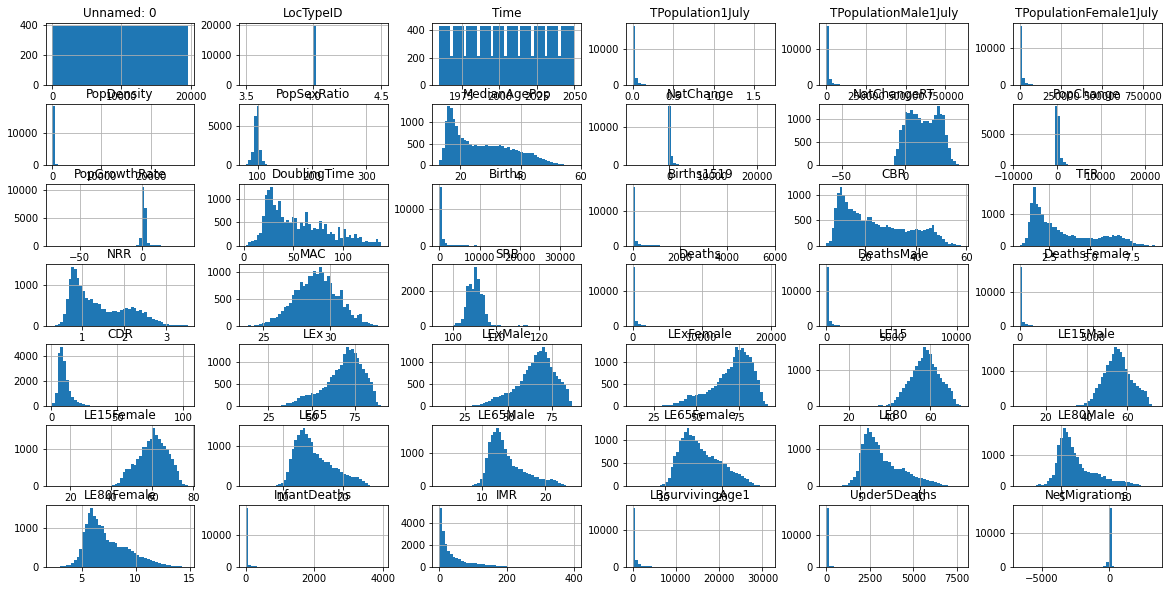

In [ ]:
data_country_specific2.hist(bins=50, figsize=(20,10))
plt.show()

#Data Preparation

In [ ]:
data_country_specific2 = data_country_specific2.drop(['Unnamed: 0','LocTypeID','LocTypeName'], axis = 1)

In [ ]:
corr_matrix = data_country_specific2.corr()
corr_matrix['NetMigrations'].sort_values(ascending=False)

NetMigrations             1.000000
PopGrowthRate             0.205177
LE80                      0.124970
LE80Female                0.122860
LE65Female                0.121640
LE65                      0.121009
LE80Male                  0.120090
LE65Male                  0.114118
MedianAgePop              0.108460
LE15                      0.103646
LE15Female                0.103577
LE15Male                  0.100545
LEx                       0.095989
LExMale                   0.095430
LExFemale                 0.095163
MAC                       0.075301
PopSexRatio               0.021254
DoublingTime              0.018058
Time                     -0.000648
PopDensity               -0.001260
CDR                      -0.018989
SRB                      -0.029862
NRR                      -0.061150
PopChange                -0.062348
TFR                      -0.063094
IMR                      -0.079738
CBR                      -0.080129
NatChangeRT              -0.080756
Births1519          

In [ ]:
data_country_specific2.shape

(19565, 41)

In [ ]:
data_country_specific2.dtypes

Location                   object
Time                        int64
TPopulation1July          float64
TPopulationMale1July      float64
TPopulationFemale1July    float64
PopDensity                float64
PopSexRatio               float64
MedianAgePop              float64
NatChange                 float64
NatChangeRT               float64
PopChange                 float64
PopGrowthRate             float64
DoublingTime              float64
Births                    float64
Births1519                float64
CBR                       float64
TFR                       float64
NRR                       float64
MAC                       float64
SRB                       float64
Deaths                    float64
DeathsMale                float64
DeathsFemale              float64
CDR                       float64
LEx                       float64
LExMale                   float64
LExFemale                 float64
LE15                      float64
LE15Male                  float64
LE15Female    

In [ ]:
data_2010_2020 = data_country_specific2.copy()
#get row 
valid_rows = data_2010_2020[data_2010_2020['Time'].isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]

test_rows = data_2010_2020[data_2010_2020['Time'].isin([2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,
                                                         2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,
                                                         2041,2042,2043,2044,2045,2046,2047,2048,2049,2050])]

In [ ]:
#del row from df
data_2010_2020 = data_2010_2020[~(data_2010_2020.Time.isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,
                                                            2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,
                                                         2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,
                                                         2041,2042,2043,2044,2045,2046,2047,2048,2049,2050]))]

In [ ]:
#concat original row to end or start of df
newdf = pd.concat([data_2010_2020, valid_rows], axis=0)
newdf1 = pd.concat([newdf, test_rows], axis=0)


In [ ]:
newdf1

,Location,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,NRR,MAC,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,LBsurvivingAge1,Under5Deaths,NetMigrations
0,Afghanistan,1960,8622.466,4476.521,4145.945,13.2797,107.9735,17.9998,158.818,18.419,161.436,1.872,37.0271,434.057,59.574,50.340,7.2817,1.8026,29.651,104.9,275.239,147.069,128.170,31.921,32.5346,31.8703,33.2849,38.2454,37.6459,39.0176,9.1927,8.8874,9.5773,4.0539,3.9313,4.1994,103.790,240.5329,364.106,151.545,2.606
1,Afghanistan,1961,8790.140,4556.369,4233.771,13.5380,107.6196,17.9244,167.811,19.094,173.912,1.979,35.0251,443.319,61.518,50.443,7.2842,1.8289,29.651,104.9,275.508,146.981,128.527,31.349,33.0681,32.4086,33.8128,38.5507,37.9509,39.3189,9.2735,8.9651,9.6573,4.0900,3.9663,4.2350,104.080,236.1826,373.167,152.016,6.109
2,Afghanistan,1962,8969.046,4642.166,4326.881,13.8135,107.2866,17.8525,176.875,19.725,183.901,2.050,33.8121,453.468,63.646,50.570,7.2918,1.8541,29.663,104.9,276.593,147.393,129.200,30.845,33.5471,32.8833,34.2969,38.8144,38.2066,39.5892,9.3435,9.0281,9.7308,4.1211,3.9945,4.2681,104.617,232.1626,382.932,152.887,7.016
3,Afghanistan,1963,9157.464,4732.954,4424.510,14.1037,106.9712,17.7876,186.264,20.344,192.935,2.107,32.8974,464.225,65.672,50.703,7.3016,1.8795,29.677,104.9,277.961,147.965,129.996,30.359,34.0162,33.3461,34.7731,39.0715,38.4527,39.8573,9.4111,9.0874,9.8036,4.1511,4.0207,4.3010,105.263,228.2390,393.236,153.919,6.681
4,Afghanistan,1964,9355.514,4828.822,4526.692,14.4087,106.6744,17.7305,196.084,20.964,203.164,2.172,31.9129,475.452,68.366,50.831,7.3043,1.9033,29.662,104.9,279.368,148.508,130.860,29.867,34.4942,33.8282,35.2464,39.3312,38.7093,40.1181,9.4799,9.1502,9.8749,4.1812,4.0481,4.3326,105.942,224.3317,403.990,154.971,7.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19560,Zimbabwe,2046,25075.678,12115.781,12959.896,64.8202,93.4867,23.9638,359.236,14.323,349.241,1.393,49.7593,553.823,71.746,22.082,2.5869,1.1915,28.291,102.6,194.587,100.578,94.009,7.759,65.1784,62.0980,67.9841,53.4472,50.6901,55.8627,14.2909,12.9717,15.1904,6.9819,6.1770,7.4125,15.660,28.2538,540.097,22.517,-9.999
19561,Zimbabwe,2047,25423.417,12289.844,13133.573,65.7191,93.5758,24.2015,356.240,14.009,346.238,1.362,50.8919,554.688,71.304,21.813,2.5674,1.1836,28.313,102.6,198.448,102.623,95.826,7.804,65.2979,62.2109,68.1180,53.5413,50.7838,55.9653,14.3061,12.9848,15.2064,6.9808,6.1762,7.4110,15.536,28.0030,541.049,22.321,-9.999
19562,Zimbabwe,2048,25766.806,12461.593,13305.213,66.6067,93.6595,24.4388,350.540,13.602,340.540,1.322,52.4317,552.827,70.558,21.451,2.5362,1.1705,28.336,102.6,202.287,104.693,97.594,7.849,65.4215,62.3191,68.2666,53.6420,50.8808,56.0784,14.3283,13.0084,15.2258,6.9842,6.1828,7.4111,15.364,27.7688,539.335,22.081,-9.999
19563,Zimbabwe,2049,26105.252,12630.714,13474.538,67.4816,93.7376,24.6767,346.348,13.265,336.352,1.288,53.8158,552.630,70.059,21.165,2.5137,1.1611,28.359,102.6,206.282,106.834,99.447,7.900,65.5429,62.4281,68.4091,53.7410,50.9742,56.1915,14.3495,13.0227,15.2501,6.9879,6.1829,7.4151,15.225,27.5376,539.243,21.873,-9.999


In [ ]:
newdf2 = newdf1.copy()

In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
newdf1['Location']= label_encoder.fit_transform(newdf1['Location']) 
print(newdf1.head())

   Location  Time  TPopulation1July  TPopulationMale1July  TPopulationFemale1July  PopDensity  PopSexRatio  MedianAgePop  NatChange  NatChangeRT  PopChange  PopGrowthRate  DoublingTime   Births  Births1519     CBR     TFR     NRR     MAC    SRB   Deaths  DeathsMale  DeathsFemale     CDR      LEx  LExMale  LExFemale     LE15  LE15Male  LE15Female    LE65  LE65Male  LE65Female    LE80  LE80Male  LE80Female  InfantDeaths       IMR  LBsurvivingAge1  Under5Deaths  NetMigrations
0         0  1960          8622.466              4476.521                4145.945     13.2797     107.9735       17.9998    158.818       18.419    161.436          1.872       37.0271  434.057      59.574  50.340  7.2817  1.8026  29.651  104.9  275.239     147.069       128.170  31.921  32.5346  31.8703    33.2849  38.2454   37.6459     39.0176  9.1927    8.8874      9.5773  4.0539    3.9313      4.1994       103.790  240.5329          364.106       151.545          2.606
1         0  1961          8790.140         

In [ ]:
newdf1 = newdf1.dropna()

In [ ]:
newdf1 = newdf1.reset_index(drop=True)

In [ ]:
newdf1.shape

(19565, 41)

In [ ]:
newdf2.shape

(19565, 41)

In [ ]:
newdf2 = newdf2.reset_index(drop=True)

#Hypothesis Testing & p-value

In [ ]:
#Checking for the p-value of the features
import statsmodels.api as sm
import pandas as pd

# defining the dependent and independent variables
X = newdf1.drop('NetMigrations', axis = 1)
Y = newdf1['NetMigrations']

# building the model and fitting the data
lin_reg = sm.OLS(Y, X)
mod = lin_reg.fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:          NetMigrations   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.733e+11
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:03:19   Log-Likelihood:                          67562.
No. Observations:               19565   AIC:                                 -1.350e+05
Df Residuals:                   19527   BIC:                                 -1.347e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
data_country_specific3 = newdf1

In [ ]:
#Significance value 0.5
data_country_specific3 = data_country_specific3.drop(['TPopulation1July','TPopulationMale1July','TPopulationFemale1July','NatChangeRT',
                                                      'MAC', 'NRR', 'LBsurvivingAge1'], axis = 1)

In [ ]:
data_country_specific3.shape

(19565, 34)

In [ ]:
data_country_specific3.columns

Index(['Location', 'Time', 'PopDensity', 'PopSexRatio', 'MedianAgePop', 'NatChange', 'PopChange', 'PopGrowthRate', 'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR', 'Under5Deaths', 'NetMigrations'], dtype='object')

In [ ]:
data_country_specific3.index[data_country_specific3['Time'] == 2010].tolist()[0]

10750

In [ ]:
newdf2.index[newdf2['Time'] == 2010].tolist()[0]

10750

In [ ]:
data_country_specific3.index[data_country_specific3['Time'] == 2021].tolist()[0]

13115

In [ ]:
newdf2.index[newdf2['Time'] == 2021].tolist()[0]

13115

In [ ]:
data_country_specific3.shape

(19565, 34)

#Data Splitting into Train, Validation & Test set

In [ ]:
#Splitting entire dataset to train set, validation set & test set
import numpy as np                                           
train_set = data_country_specific3.iloc[:10750]
valid_set = data_country_specific3.iloc[10750:13115]
test_set = data_country_specific3.iloc[13115:]
    
train_set.shape, valid_set.shape, test_set.shape

((10750, 34), (2365, 34), (6450, 34))

In [ ]:
valid_w_location = newdf2.iloc[10750:13115]
valid_w_location.shape

(2365, 41)

In [ ]:
valid_w_location.head()

,Location,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,NRR,MAC,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,LBsurvivingAge1,Under5Deaths,NetMigrations
10750,Afghanistan,2010,28189.672,14240.377,13949.295,43.4157,102.0867,14.4037,914.335,32.348,773.004,2.742,25.2789,1147.643,189.334,40.602,6.0987,2.5563,29.155,106.1,233.308,123.311,109.997,8.254,60.8508,59.2776,62.4078,52.6916,51.2089,54.1305,12.6599,11.9790,13.2647,5.4119,5.1465,5.6127,74.117,64.8376,1090.266,101.264,-141.355
10751,Afghanistan,2011,29249.157,14780.282,14468.875,45.0475,102.1523,14.6790,927.172,31.924,1345.966,4.603,15.0586,1157.518,191.027,39.855,5.9581,2.5171,29.149,105.9,230.346,121.782,108.564,7.931,61.4191,59.8254,62.9926,52.9789,51.4814,54.4282,12.7258,12.0381,13.3294,5.4336,5.1663,5.6309,71.920,62.2760,1101.402,97.551,418.796
10752,Afghanistan,2012,30466.479,15399.106,15067.373,46.9223,102.2017,15.0109,982.767,32.298,1088.677,3.574,19.3942,1217.396,193.789,40.009,5.8302,2.4794,29.200,105.8,234.629,124.308,110.321,7.711,61.9230,60.3173,63.5135,53.2341,51.7323,54.6934,12.7817,12.0919,13.3889,5.4451,5.1843,5.6479,72.314,59.9699,1160.079,96.831,105.905
10753,Afghanistan,2013,31541.209,15946.572,15594.636,48.5775,102.2568,15.2393,1012.711,32.123,1060.783,3.363,20.6110,1248.455,193.620,39.601,5.6962,2.4377,29.259,105.7,235.744,125.053,110.691,7.478,62.4167,60.7915,64.0268,53.4906,51.9783,54.9600,12.8425,12.1458,13.4497,5.4631,5.2023,5.6652,71.817,57.8091,1191.345,95.430,48.076
10754,Afghanistan,2014,32716.210,16543.889,16172.321,50.3872,102.2976,15.5009,1033.610,31.710,1289.220,3.941,17.5881,1274.665,191.291,39.105,5.5595,2.3870,29.289,105.6,241.055,128.527,112.527,7.395,62.5451,60.8119,64.2743,53.4859,51.8580,55.0822,12.8507,12.1459,13.4592,5.4658,5.2050,5.6667,71.420,56.2562,1217.603,95.270,255.611


In [ ]:
#Separating the dependent & independent variables
Xtrain = train_set.drop('NetMigrations', axis = 1)
Ytrain = train_set['NetMigrations']

Xvalid = valid_set.drop('NetMigrations', axis = 1)
Yvalid = valid_set['NetMigrations']

Xtest = test_set.drop('NetMigrations', axis = 1)
Ytest = test_set['NetMigrations']

#Training & Validation

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso                                                              #Traininig & Testing on train + validation set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

las_reg = Lasso(alpha=50)
las_reg.fit(Xtrain, Ytrain)


migration_predictions_tr = las_reg.predict(Xtrain)
lin_mse = mean_squared_error(migration_predictions_tr,Ytrain)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(migration_predictions_tr,Ytrain)
print("RMSE for Lasso regression =",lin_rmse)
print("MAE for Lasso Regression(Train set) =",lin_mae)

RMSE for Lasso regression = 1.3323332301109143
MAE for Lasso Regression(Train set) = 0.4518218577309793


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.439e+05, tolerance: 1.828e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Lasso Regression
from sklearn.metrics import mean_squared_error                              #Traininig on train set & testing on validation set
from sklearn.metrics import mean_absolute_error

migration_predictions_val = las_reg.predict(Xvalid)
lin_mse = mean_squared_error(migration_predictions_val,Yvalid)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(migration_predictions_val,Yvalid)
print("RMSE for Lasso Regression(Valid set) =", lin_rmse)
print("MAE for Lasso Regression(Valid set) =", lin_mae)

RMSE for Lasso Regression(Valid set) = 2.319367913868758
MAE for Lasso Regression(Valid set) = 0.7109543188040081


In [ ]:
#Checking the Lasso model coefficient to check which features the model thinks is redundant
las_reg.coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.47753686,  0.99165135,  0.        ,  0.        , -0.51314   ,
       -0.0015007 , -0.        , -0.        ,  0.        ,  0.48714216,
        0.        ,  0.05243884, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

In [ ]:
'Location', 'Time', 'PopDensity', 'PopSexRatio', 'MedianAgePop', 
'NatChange', 'PopChange', 'PopGrowthRate', 'DoublingTime', 'Births',
'Births1519', 'CBR', 'TFR', 'SRB', 'Deaths', 
'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 
'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 
'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 
'InfantDeaths', 'IMR', 'Under5Deaths'

('Under5Deaths', 'NetMigrations')

In [ ]:
#Removing features whose Lasso coeffiecients are 0
#NatChange, PopChange, Births, Deaths, DeathsFemale, Under5Deaths, LBsurvivingAge1, InfantDeaths
updated_lasso_Xtrain = Xtrain[['Time','NatChange', 'PopChange','Births','Births1519','Deaths','DeathsFemale']]
updated_lasso_Xtrain.head()

,Time,NatChange,PopChange,Births,Births1519,Deaths,DeathsFemale
0,1960,158.818,161.436,434.057,59.574,275.239,128.170
1,1961,167.811,173.912,443.319,61.518,275.508,128.527
2,1962,176.875,183.901,453.468,63.646,276.593,129.200
3,1963,186.264,192.935,464.225,65.672,277.961,129.996
4,1964,196.084,203.164,475.452,68.366,279.368,130.860


In [ ]:
#Removing features whose Lasso coeffiecients are 0
#NatChange, PopChange, Births, Deaths, DeathsFemale, Under5Deaths, LBsurvivingAge1, InfantDeaths
updated_lasso_Xvalid = Xvalid[['Time','NatChange', 'PopChange','Births','Births1519','Deaths','DeathsFemale']]
updated_lasso_Xvalid.head()

,Time,NatChange,PopChange,Births,Births1519,Deaths,DeathsFemale
10750,2010,914.335,773.004,1147.643,189.334,233.308,109.997
10751,2011,927.172,1345.966,1157.518,191.027,230.346,108.564
10752,2012,982.767,1088.677,1217.396,193.789,234.629,110.321
10753,2013,1012.711,1060.783,1248.455,193.620,235.744,110.691
10754,2014,1033.610,1289.220,1274.665,191.291,241.055,112.527


In [ ]:
#Lasso Regression
las_reg.fit(updated_lasso_Xtrain, Ytrain)                                   #Re-Traininig on updated train set & Re-testing on validation set


migration_predictions_val = las_reg.predict(updated_lasso_Xvalid)
lin_mse = mean_squared_error(migration_predictions_val,Yvalid)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(migration_predictions_val,Yvalid)
print("RMSE for Lasso regression(Valid set) =",lin_rmse)
print("MAE for Lasso Regression(Valid set) =",lin_mae)

RMSE for Lasso regression(Valid set) = 1.5607635627852579
MAE for Lasso Regression(Valid set) = 0.5452869298284134


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.961e+05, tolerance: 1.828e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Combining Training & Validation set
train_and_valid_predictors= Xtrain.append(Xvalid)
train_and_valid_labels = Ytrain.append(Yvalid)

train_and_valid_predictors.shape , train_and_valid_labels.shape

((13115, 33), (13115,))

#Saving the Validation test result for furthur evaluation

In [ ]:
Xvalid['Actual_Net_Migration'] = Yvalid

In [ ]:
Xvalid['Predicted_Net_Migration'] =migration_predictions_val

In [ ]:
Xvalid.head()

,Location,Time,PopDensity,PopSexRatio,MedianAgePop,NatChange,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,Under5Deaths,Actual_Net_Migration,Predicted_Net_Migration
10750,0,2010,43.4157,102.0867,14.4037,914.335,773.004,2.742,25.2789,1147.643,189.334,40.602,6.0987,106.1,233.308,123.311,109.997,8.254,60.8508,59.2776,62.4078,52.6916,51.2089,54.1305,12.6599,11.9790,13.2647,5.4119,5.1465,5.6127,74.117,64.8376,101.264,-141.355,-140.041600
10751,0,2011,45.0475,102.1523,14.6790,927.172,1345.966,4.603,15.0586,1157.518,191.027,39.855,5.9581,105.9,230.346,121.782,108.564,7.931,61.4191,59.8254,62.9926,52.9789,51.4814,54.4282,12.7258,12.0381,13.3294,5.4336,5.1663,5.6309,71.920,62.2760,97.551,418.796,416.064561
10752,0,2012,46.9223,102.2017,15.0109,982.767,1088.677,3.574,19.3942,1217.396,193.789,40.009,5.8302,105.8,234.629,124.308,110.321,7.711,61.9230,60.3173,63.5135,53.2341,51.7323,54.6934,12.7817,12.0919,13.3889,5.4451,5.1843,5.6479,72.314,59.9699,96.831,105.905,105.450209
10753,0,2013,48.5775,102.2568,15.2393,1012.711,1060.783,3.363,20.6110,1248.455,193.620,39.601,5.6962,105.7,235.744,125.053,110.691,7.478,62.4167,60.7915,64.0268,53.4906,51.9783,54.9600,12.8425,12.1458,13.4497,5.4631,5.2023,5.6652,71.817,57.8091,95.430,48.076,48.039749
10754,0,2014,50.3872,102.2976,15.5009,1033.610,1289.220,3.941,17.5881,1274.665,191.291,39.105,5.5595,105.6,241.055,128.527,112.527,7.395,62.5451,60.8119,64.2743,53.4859,51.8580,55.0822,12.8507,12.1459,13.4592,5.4658,5.2050,5.6667,71.420,56.2562,95.270,255.611,254.081769


In [ ]:
valid_w_location['Location']

10750    Afghanistan
10751    Afghanistan
10752    Afghanistan
10753    Afghanistan
10754    Afghanistan
            ...     
13110       Zimbabwe
13111       Zimbabwe
13112       Zimbabwe
13113       Zimbabwe
13114       Zimbabwe
Name: Location, Length: 2365, dtype: object

In [ ]:
Xvalid['Country'] = valid_w_location['Location']

In [ ]:
Lasso = Xvalid[['Country','Time','Actual_Net_Migration','Predicted_Net_Migration']]

In [ ]:
Lasso.head()

,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
10750,Afghanistan,2010,-141.355,-140.041600
10751,Afghanistan,2011,418.796,416.064561
10752,Afghanistan,2012,105.905,105.450209
10753,Afghanistan,2013,48.076,48.039749
10754,Afghanistan,2014,255.611,254.081769


In [ ]:
Lasso.to_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/Lasso_Regression_Predicted_2010_2020.csv")